In [ ]:
from skimage.io import imread,imshow
from skimage.transform  import resize
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np



In [ ]:
image_size=[224,224]
train_path='/content/drive/MyDrive/Deep_Learning/Brain-Tumor-Classification-DataSet-master/Training'
test_path='/content/drive/MyDrive/Deep_Learning/Brain-Tumor-Classification-DataSet-master/Testing'

In [ ]:
vgg=VGG19(include_top=False,weights='imagenet',input_shape=image_size+[3])
# include_top=false which means avoid flatten and dense layers

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg.layers
# vgg.layers includes  conv,maxpooling layer if include_top=false

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <Conv2D name=block3_conv4, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <Conv2D name=block4_conv4, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <Conv2D name=block5_conv4, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [ ]:
# must do
for layer in vgg.layers:
   layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(4,activation='softmax')(x)

In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,124,740 (76.77 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')

test_set=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
r=model.fit(training_set,validation_data=test_set,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1343s 15s/step - accuracy: 0.5450 - loss: 1.2504 - val_accuracy: 0.5736 - val_loss: 1.7174
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 562ms/step - accuracy: 0.7884 - loss: 0.5194 - val_accuracy: 0.5990 - val_loss: 1.6134
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 562ms/step - accuracy: 0.8231 - loss: 0.4330 - val_accuracy: 0.6371 - val_loss: 1.8516
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 50s 559ms/step - accuracy: 0.8424 - loss: 0.3936 - val_accuracy: 0.6827 - val_loss: 1.5202
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 53s 589ms/step - accuracy: 0.8775 - loss: 0.3294 - val_accuracy: 0.6701 - val_loss: 1.7080


In [ ]:
r.history

{'accuracy': [0.6501742005348206,
  0.808013916015625,
  0.8421602845191956,
  0.8484320640563965,
  0.8665505051612854],
 'loss': [0.90181565284729,
  0.4981660544872284,
  0.4047863185405731,
  0.3915632963180542,
  0.3530821204185486],
 'val_accuracy': [0.5736040472984314,
  0.5989847779273987,
  0.6370558142662048,
  0.682741105556488,
  0.6700507402420044],
 'val_loss': [1.7174267768859863,
  1.6133571863174438,
  1.8515827655792236,
  1.5202029943466187,
  1.7079699039459229]}

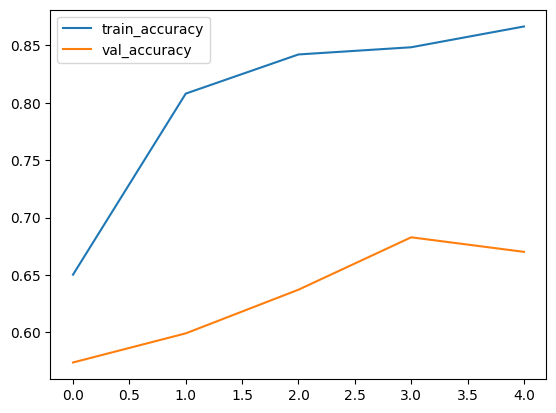

In [ ]:

plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

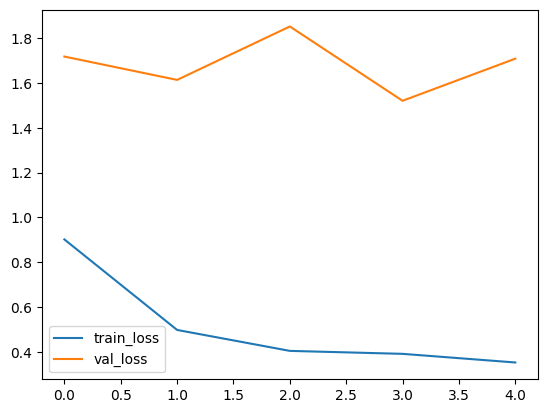

In [ ]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
model.save("model_tumour_prediction.h5")

In [ ]:
def predict(model,image_path):
 img=imread(image_path)
 img=resize(img,(224,224,3))
 img=img.reshape(1,224,224,3)
 pred=model.predict(img)
 ind=pred.argmax()
 img_list=os.listdir(train_path)
 return img_list[ind]





In [ ]:
image_path='/content/drive/MyDrive/Deep_Learning/Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/image(10).jpg'
predict(model,image_path)

NameError: name 'model' is not defined